# **Cleaning Data in Python**

In [38]:
import pandas as pd
import numpy as np
from anaconda3.Tools.scripts.dutree import display

# **Ch1 Common data problems**

## **1.1 Data type constraints**

In [3]:
data = {
    "OrderID": [1, 2, 3],
    "Revenue": ["$1000", "$1500", "$2000"],
    "Quantity": [5, 3, 8]
}
df = pd.DataFrame(data)
df

,OrderID,Revenue,Quantity
0,1,$1000,5
1,2,$1500,3
2,3,$2000,8


In [6]:
df.dtypes

OrderID      int64
Revenue     object
Quantity     int64
dtype: object

In [8]:
df.isna().sum()

OrderID     0
Revenue     0
Quantity    0
dtype: int64

In [9]:
df["Revenue"].sum()   # هيجمع النصوص كـ string concatenation

'$1000$1500$2000'

In [4]:
df["Revenue"] = df["Revenue"].str.strip("$").astype(int)
# Remove "$" then convert to int

In [5]:
df

,OrderID,Revenue,Quantity
0,1,1000,5
1,2,1500,3
2,3,2000,8


In [12]:
c

OrderID     int64
Revenue     int64
Quantity    int64
dtype: object

In [6]:
df["Revenue"].sum()

np.int64(4500)

### **🟠  Assert statement – جملة التحقق**

In [14]:
assert 1 + 1 == 2   # Nothing

In [21]:
#assert 1 + 1 == 3   # AssertionError

In [16]:
assert df["Revenue"].dtype == "int64"

### **🟡 Numeric or categorical?**

### **📌 المشكلة:**

أحيانًا داتا شكلها أرقام لكنها في الحقيقة categories.

مثال: Marital Status

0 → Never Married

1 → Married

2 → Separated

3 → Divorced

لما نستورد العمود → هيبقى int.
لكن إحصائيات زي mean و std مالهاش معنى هنا.

In [23]:
status_data = {
    "Name": ["Ali", "Sara", "Omar", "Laila"],
    "Marital_Status": [0, 1, 2, 1]
}

df2 = pd.DataFrame(status_data)
display(df2)
df2.describe()  # لكن إحصائيات زي mean و std مالهاش معنى هنا.

,Name,Marital_Status
0,Ali,0
1,Sara,1
2,Omar,2
3,Laila,1


,Marital_Status
count,4.000000
mean,1.000000
std,0.816497
min,0.000000
25%,0.750000
50%,1.000000
75%,1.250000
max,2.000000


In [18]:
# Convert to category
df2["Marital_Status"] = df2["Marital_Status"].astype("category")

print(df2["Marital_Status"].describe())

count     4
unique    3
top       1
freq      2
Name: Marital_Status, dtype: int64


In [ ]:
assert df2["Marital_Status"].dtype == "category"


## **1.2 Data range constraints**

### **📌 الفكرة**

أي عمود (Column) عنده قيمة مسموح بيها (Range).

لو لقينا قيم خارج المدى → غالبًا دي أخطاء إدخال أو جمع بيانات.

لازم نتصرف معاها (drop – replace – fix).

### **🟡 3. How to deal with out-of-range data**

#### 1. **Drop values** (لو عددها قليل).

لكن لو كتير → هنفقد Data مهمة.

#### 2.  **Set custom min/max**

زي لما نقول: أي rating أكبر من 5 → نحوله لـ 5.

#### 3.  **Set to Missing** (NaN)

ونعوّضه (imputation) لاحقًا.

#### 4.  **Business rules adjustment**

حسب طبيعة الشغل، ممكن نستبدل القيم بحد معين.

### **🔵 4. Movie Example**

In [8]:
import pandas as pd

movies = {
    "Title": ["Movie A", "Movie B", "Movie C", "Movie D"],
    "avg_rating": [4, 5, 6, 3]
}

df = pd.DataFrame(movies)
display(df)

,Title,avg_rating
0,Movie A,4
1,Movie B,5
2,Movie C,6
3,Movie D,3


#### **🛑 الحل 1: Drop rows with wrong ratings**

In [11]:
df.drop(df[df["avg_rating"] > 5].index, inplace = True)
# == df = df[df["avg_rating"] <= 5]

assert df["avg_rating"].max() <= 5
df

,Title,avg_rating
0,Movie A,4
1,Movie B,5
3,Movie D,3


#### **🛑 الحل 2: Replace with max allowed (5)**

In [13]:
df = pd.DataFrame(movies)
df.loc[df["avg_rating"] > 5, "avg_rating"] = 5
assert df["avg_rating"].max() <= 5
df

,Title,avg_rating
0,Movie A,4
1,Movie B,5
2,Movie C,5
3,Movie D,3


### **🟣 5. Date Example**

In [14]:
import datetime as dt
today = dt.datetime.today()

subs = {
    "User": ["Ali", "Sara", "Omar"],
    "subscription_date": ["2023-05-10", "2025-12-01", "2024-06-15"]
    # واحدة في المستقبل
}
df = pd.DataFrame(subs)
df

,User,subscription_date
0,Ali,2023-05-10
1,Sara,2025-12-01
2,Omar,2024-06-15


In [15]:
df.dtypes

User                 object
subscription_date    object
dtype: object

In [25]:
df["subscription_date"] = pd.to_datetime(df["subscription_date"])
df.dtypes


User                         object
subscription_date    datetime64[ns]
dtype: object

In [24]:
df["subscription_date"] = pd.to_datetime(df["subscription_date"]).dt.date
df.dtypes

User                 object
subscription_date    object
dtype: object

In [28]:
df.drop(df[df["subscription_date"] > today ].index , inplace = True)
assert df["subscription_date"].max() <= today
df

,User,subscription_date
0,Ali,2023-05-10
2,Omar,2024-06-15


## **1.3 Uniqueness constraints**

In [2]:
import pandas as pd

data = {
    "first_name": ["Ali", "Ali", "Sara", "Omar", "Omar"],
    "last_name": ["Hassan", "Hassan", "Ibrahim", "Youssef", "Youssef"],
    "address": ["Cairo", "Cairo", "Giza", "Alex", "Alex"],
    "height": [175, 175, 160, 180, 181],  # اختلاف بسيط هنا
    "weight": [70, 70, 55, 80, 80]
}

df = pd.DataFrame(data)
display(df)


,first_name,last_name,address,height,weight
0,Ali,Hassan,Cairo,175,70
1,Ali,Hassan,Cairo,175,70
2,Sara,Ibrahim,Giza,160,55
3,Omar,Youssef,Alex,180,80
4,Omar,Youssef,Alex,181,80


### **3️⃣ How to find duplicates?**

In [32]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

افتراضيًا duplicated() بيبص على كل الأعمدة.

بيعتبر أول نسخة False (يعني مش مكررة)، والباقي True.

In [31]:
df[df.duplicated()]


,first_name,last_name,address,height,weight
1,Ali,Hassan,Cairo,175,70


In [ ]:
# نحدد التكرار بالاعتماد على الاسم والعنوان فقط
df[df.duplicated(subset=["first_name", "last_name", "address"], keep="last")]


### **5️⃣ How to treat duplicates?**

In [36]:
df_clean = df.drop_duplicates()
df_clean

,first_name,last_name,address,height,weight
0,Ali,Hassan,Cairo,175,70
2,Sara,Ibrahim,Giza,160,55
3,Omar,Youssef,Alex,180,80
4,Omar,Youssef,Alex,181,80


In [38]:
df.drop_duplicates(subset=["first_name", "last_name", "address"], inplace=True)
df

,first_name,last_name,address,height,weight
0,Ali,Hassan,Cairo,175,70
2,Sara,Ibrahim,Giza,160,55
3,Omar,Youssef,Alex,180,80


### **📌 الحالة الثانية: partial duplicates**
 (مع اختلاف في أرقام زي الطول/الوزن)

هنا مش هنمسح على طول. لازم نقرر:

ناخد المتوسط (mean).

ناخد الأكبر (max).

In [3]:
df = pd.DataFrame(data)

In [4]:
summaries = {
    "height": "max",   # ناخد الطول الأكبر
    "weight": "mean"   # ناخد متوسط الوزن
}

df_grouped = (
    df.groupby(["first_name", "last_name", "address"])
      .agg(summaries)
      .reset_index()
)

display(df_grouped)


,first_name,last_name,address,height,weight
0,Ali,Hassan,Cairo,175,70.0
1,Omar,Youssef,Alex,181,80.0
2,Sara,Ibrahim,Giza,160,55.0


In [5]:
assert df_grouped.duplicated().sum() == 0


duplicated() → تكتشف التكرار.

drop_duplicates() → تمسح التكرارات الكاملة.

groupby().agg() → تعالج التكرارات الجزئية بطريقة ذكية.

# **Ch2 Text and categorical data problems**

## **2.1 Membership constraints**

### **1️⃣ الفكرة الأساسية**

بعض الأعمدة بتبقى Categorical Variables (قيمها لازم تنتمي لمجموعة معروفة ومحددة مسبقًا).
أمثلة:

فصائل الدم: ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]

الحالة الاجتماعية: ["Single", "Married", "Divorced", "Widowed"]

حالة القرض: ["Approved", "Pending", "Rejected"]

➡️ أي قيمة خارج القايمة دي تعتبر خطأ / Inconsistent Value.

In [7]:
import pandas as pd

# بيانات الطلاب
study_data = pd.DataFrame({
    "first_name": ["Ali", "Sara", "Omar", "Laila"],
    "birth_date": ["2000-05-01", "1999-08-12", "2001-01-22", "1998-09-15"],
    "blood_type": ["A+", "B-", "Z+", "O+"]  # لاحظ "Z+" غلط
})

# القيم الصحيحة لفصائل الدم
categories = pd.DataFrame({
    "blood_type": ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
})


In [8]:
valid = set(categories["blood_type"])
found = set(study_data["blood_type"])

inconsistent = found.difference(valid)
print(inconsistent)

{'Z+'}


In [10]:
inconsistent_rows = study_data[study_data["blood_type"].isin(inconsistent)]
display(inconsistent_rows)


,first_name,birth_date,blood_type
2,Omar,2001-01-22,Z+


In [12]:
clean_data = study_data[~study_data["blood_type"].isin(inconsistent)]
clean_data


,first_name,birth_date,blood_type
0,Ali,2000-05-01,A+
1,Sara,1999-08-12,B-
3,Laila,1998-09-15,O+


In [13]:
# Inner Join (القيم السليمة)
inner = study_data.merge(categories, on="blood_type", how="inner")
inner

,first_name,birth_date,blood_type
0,Ali,2000-05-01,A+
1,Sara,1999-08-12,B-
2,Laila,1998-09-15,O+


In [15]:
# Left Anti Join (القيم الغلط)
anti = study_data.merge(categories, on="blood_type", how="left", indicator=True)
anti = anti[anti["_merge"] == "left_only"].drop(columns="_merge")
anti

,first_name,birth_date,blood_type
2,Omar,2001-01-22,Z+


## **2.2 Categorical variables**

Categorical variables – مشاكل البيانات التصنيفية

الدرس ده بيكمل اللي قبله، وبيتكلم عن ٣ مشاكل أساسية في categorical data:

#### **1. Value inconsistency**
(اختلاف القيم في الشكل/الكتابة).

#### **2. Collapsing categories**
(تقليل عدد الكاتيجوريز أو عمل grouping).

#### **3. Making sure data type is correct**
 (إن العمود يبقى فعلاً Categorical مش String عشوائي).

### **🟢 1. Value Consistency**

In [16]:
import pandas as pd

data = {
    "Name": ["Ali", "Sara", "Omar", "Nada", "Mona"],
    "marriage_status": ["Married", "married", "MARRIED", "Single", " Single "]
}

df = pd.DataFrame(data)
df["marriage_status"].value_counts()

marriage_status
Married     1
married     1
MARRIED     1
Single      1
 Single     1
Name: count, dtype: int64

### **Sol**

In [21]:
df["marriage_status"] = df['marriage_status'].str.lower()  # توحيد الحروف

In [22]:
df["marriage_status"] = df['marriage_status'].str.strip() # حذف المسافات

In [18]:
df

,Name,marriage_status
0,Ali,married
1,Sara,married
2,Omar,married
3,Nada,single
4,Mona,single


In [23]:
df['marriage_status'].value_counts()

marriage_status
married    3
single     2
Name: count, dtype: int64

### **🟢 2. Collapsing Data into Categories**

#### **(أ) إنشاء فئات من أرقام باستخدام qcut**

qcut يقسم البيانات تلقائيًا حسب التوزيع.

In [25]:
import numpy as np

df["income"] = [2000, 3500, 12000, 5000, 8000]

group_names = ["Low", "Medium", "High"]
df["income_group"] = pd.qcut(df["income"], q=3, labels=group_names)

df


,Name,marriage_status,income,income_group
0,Ali,married,2000,Low
1,Sara,married,3500,Low
2,Omar,married,12000,High
3,Nada,single,5000,Medium
4,Mona,single,8000,High


In [26]:
bins = [0, 4000, 9000, np.inf]    # الحواجز اللي اللي هيفصل بيها
labels = ["Low", "Medium", "High"]

df["income_group_custom"] = pd.cut(df["income"], bins=bins, labels=labels)
df


,Name,marriage_status,income,income_group,income_group_custom
0,Ali,married,2000,Low,Low
1,Sara,married,3500,Low,Low
2,Omar,married,12000,High,High
3,Nada,single,5000,Medium,Medium
4,Mona,single,8000,High,Medium


### **🟢 3. Reducing Categories**

In [28]:
df = pd.DataFrame({'Name': ["Ali", "Sara", "Omar", "Nada", "Mona", 'Haide']})
df["OS"] = ["Windows", "MacOS", "Linux", "Android", "iOS", "Ubuntu"]

mapping = {
    "Windows": "DesktopOS",
    "MacOS": "DesktopOS",
    "Linux": "DesktopOS",
    "Ubuntu": "DesktopOS",
    "Android": "MobileOS",
    "iOS": "MobileOS"
}

df["OS_grouped"] = df["OS"].replace(mapping)
print(df[["OS", "OS_grouped"]])


        OS OS_grouped
0  Windows  DesktopOS
1    MacOS  DesktopOS
2    Linux  DesktopOS
3  Android   MobileOS
4      iOS   MobileOS
5   Ubuntu  DesktopOS


## **2.3 Cleaning text data**

### **🟢 1. What is Text Data?**

Text data = أي عمود فيه Strings (أسماء، تليفونات، إيميلات، عناوين…).

مشاكلها الشائعة:

Inconsistency (عدم تناسق) → زي اختلاف الكتابة (Ali, ali).

Wrong format → زي رقم تليفون ناقص أرقام.

Extra symbols → زي - أو + في النص.

طول مختلف → إيميل ناقص أو رقم قصير.

### **🟢 2. مثال على مشكلة أرقام التليفونات**

In [29]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "Name": ["Ali", "Sara", "Omar", "Nada"],
    "Phone": ["+20123456789", "0020123456789", "1234", "0020-987-654-321"]
})

df

,Name,Phone
0,Ali,+20123456789
1,Sara,0020123456789
2,Omar,1234
3,Nada,0020-987-654-321


In [30]:
df["Phone"] = df["Phone"].str.replace("+", '00', regex=False)  # استبدال + بـ 00

In [31]:
df["Phone"] = df["Phone"].str.replace("-", '', regex=False)   # حذف الـ -

In [33]:
df.loc[df["Phone"].str.len() < 10, "Phone"] = np.nan   # الأرقام الأقل من 10 → نحولها NaN

In [ ]:
assert df['Phone'].str.len().min() >= 10              # لازم أقل طول >= 10
assert not df["Phone"].str.contains(r"\+|\-").any()  # لازم مفيش + أو - موجود


In [34]:
df

,Name,Phone
0,Ali,0020123456789
1,Sara,0020123456789
2,Omar,NaN
3,Nada,0020987654321


In [36]:
df = pd.DataFrame({
    "Name": ["Ali", "Sara", "Omar", "Nada"],
    "Phone": ["+20123456789", "0020123456789", "1234", "0020-987-654-321"]
})

In [37]:
df["Phone"] = df["Phone"].str.replace(r"\D", "", regex=True)
df

,Name,Phone
0,Ali,20123456789
1,Sara,0020123456789
2,Omar,1234
3,Nada,0020987654321


# **Ch3 Advanced data problems**

## **3.1 Uniformity**

### **🔹 الفكرة الأساسية: Uniformity**

البيانات لازم تكون موحدة (Uniform) في الـ units أو الـ format.

لو عندك نفس العمود لكن جزء بالسيلسيوس (°C) وجزء بالفهرنهايت (°F) → التحليل هيطلع مضلل جدًا.

نفس الكلام مع:

الوزن (kg vs pounds)

التاريخ (2023-05-10 vs 05/10/2023 vs 10 May 2023)

العملة (USD vs EUR)

### **1️⃣ Temperature Example**

In [39]:
import pandas as pd

temperatures = pd.DataFrame({
    "Day": range(1, 6),
    "Temp": [12, 15, 22, 70, 75]  # آخر قيمتين Fahrenheit
})
temperatures

,Day,Temp
0,1,12
1,2,15
2,3,22
3,4,70
4,5,75


In [44]:
import numpy as np

temperatures.loc[temperatures['Temp'] > 40, 'Temp'] = (temperatures['Temp'] - 32) * (5/9)
temperatures['Temp'] = temperatures['Temp'].astype(float).round(2)
temperatures

,Day,Temp
0,1,12.00
1,2,15.00
2,3,22.00
3,4,21.11
4,5,23.89


In [45]:
assert temperatures['Temp'].max() < 40

### **2️⃣ Date Example**

In [47]:
birthdays = pd.DataFrame({
    "Name": ["Ibrahim", "Sara", "Omar", "Mona"],
    "Birthday": ["05/10/2023", "2023-12-01", "10 May 2022", "32/12/2020"]  # الأخيرة غلط
})
display(birthdays)


,Name,Birthday
0,Ibrahim,05/10/2023
1,Sara,2023-12-01
2,Omar,10 May 2022
3,Mona,32/12/2020


In [48]:
birthdays["Birthday"] = pd.to_datetime(
    birthdays["Birthday"], errors="coerce"
)
birthdays


,Name,Birthday
0,Ibrahim,2023-05-10
1,Sara,NaT
2,Omar,NaT
3,Mona,NaT


In [49]:
birthdays["Birthday"] = birthdays["Birthday"].dt.strftime("%d-%m-%Y")
(birthdays)


,Name,Birthday
0,Ibrahim,10-05-2023
1,Sara,NaN
2,Omar,NaN
3,Mona,NaN


In [51]:
birthdays["Birthday"] = birthdays["Birthday"].fillna("2000-01-01")
birthdays

,Name,Birthday
0,Ibrahim,10-05-2023
1,Sara,01-01-2000
2,Omar,01-01-2000
3,Mona,01-01-2000


## **3.2 Cross field validation**

### **🎯 الفكرة العامة**

عندنا DataFrame فيه أعمدة مرتبطة ببعض (زي مجموع الركاب في الطيارات، أو العمر وتاريخ الميلاد).

Cross field validation يعني نستخدم أكتر من عمود مع بعض علشان نتحقق من صحة البيانات (data integrity).

لو لقينا تناقض → ده دليل إن البيانات فيها مشكلة (dirty data).

### **Ex-1**

In [52]:
import pandas as pd

flights = pd.DataFrame({
    "economy": [100, 150, 200, 80],
    "business": [20, 30, 40, 25],
    "first_class": [5, 10, 12, 5],
    "total_passengers": [125, 200, 260, 120]  # لاحظ إن فيه أرقام مش مظبوطة
})

(flights)


,economy,business,first_class,total_passengers
0,100,20,5,125
1,150,30,10,200
2,200,40,12,260
3,80,25,5,120


In [53]:
# جمع الركاب في كل درجة
flights["calculated_total"] = flights[["economy", "business", "first_class"]].sum(axis=1)

# مقارنة المجموع مع total_passengers
flights["is_valid"] = flights["calculated_total"] == flights["total_passengers"]

(flights)


,economy,business,first_class,total_passengers,calculated_total,is_valid
0,100,20,5,125,125,True
1,150,30,10,200,190,False
2,200,40,12,260,252,False
3,80,25,5,120,110,False


### **Ex-2**

In [58]:
import datetime as dt

users = pd.DataFrame({
    "Name": ["Ali", "Sara", "Omar"],
    "Birthday": ["1990-05-10", "1985-12-01", "2000-06-15"],
    "Age": [33, 40 , 30]  # في واحد غلط
})

# تحويل الـ Birthday لـ datetime
users["Birthday"] = pd.to_datetime(users["Birthday"])

users

,Name,Birthday,Age
0,Ali,1990-05-10,33
1,Sara,1985-12-01,40
2,Omar,2000-06-15,30


In [59]:
today = dt.datetime.today()

users['calculated_age'] = today.year - users['Birthday'].dt.year

users["is_valid"] = users['calculated_age'] == users['Age']

users

,Name,Birthday,Age,calculated_age,is_valid
0,Ali,1990-05-10,33,35,False
1,Sara,1985-12-01,40,40,True
2,Omar,2000-06-15,30,25,False


### **3.3 Completeness**

### **🟢 ما هو Missing Data؟**

يعني في خانة المفروض يبقى فيها قيمة، لكن مفيش حاجة.

بيتسجل غالبًا كـ NaN أو NA.

ساعات بيتسجل بأرقام أو رموز غلط (زي 0 أو .) بدل ما يسيبها فاضية.

بيحصل نتيجة أخطاء بشرية أو مشاكل تقنية.

In [3]:
import pandas as pd
import numpy as np

airquality = pd.DataFrame({
    "Temperature": [15, -39, -49, 20, -30],
    "CO2": [2.5, np.nan, np.nan, 3.1, np.nan]
})
display(airquality.isna())
airquality.isna().sum()


,Temperature,CO2
0,False,False
1,False,True
2,False,True
3,False,False
4,False,True


Temperature    0
CO2            3
dtype: int64

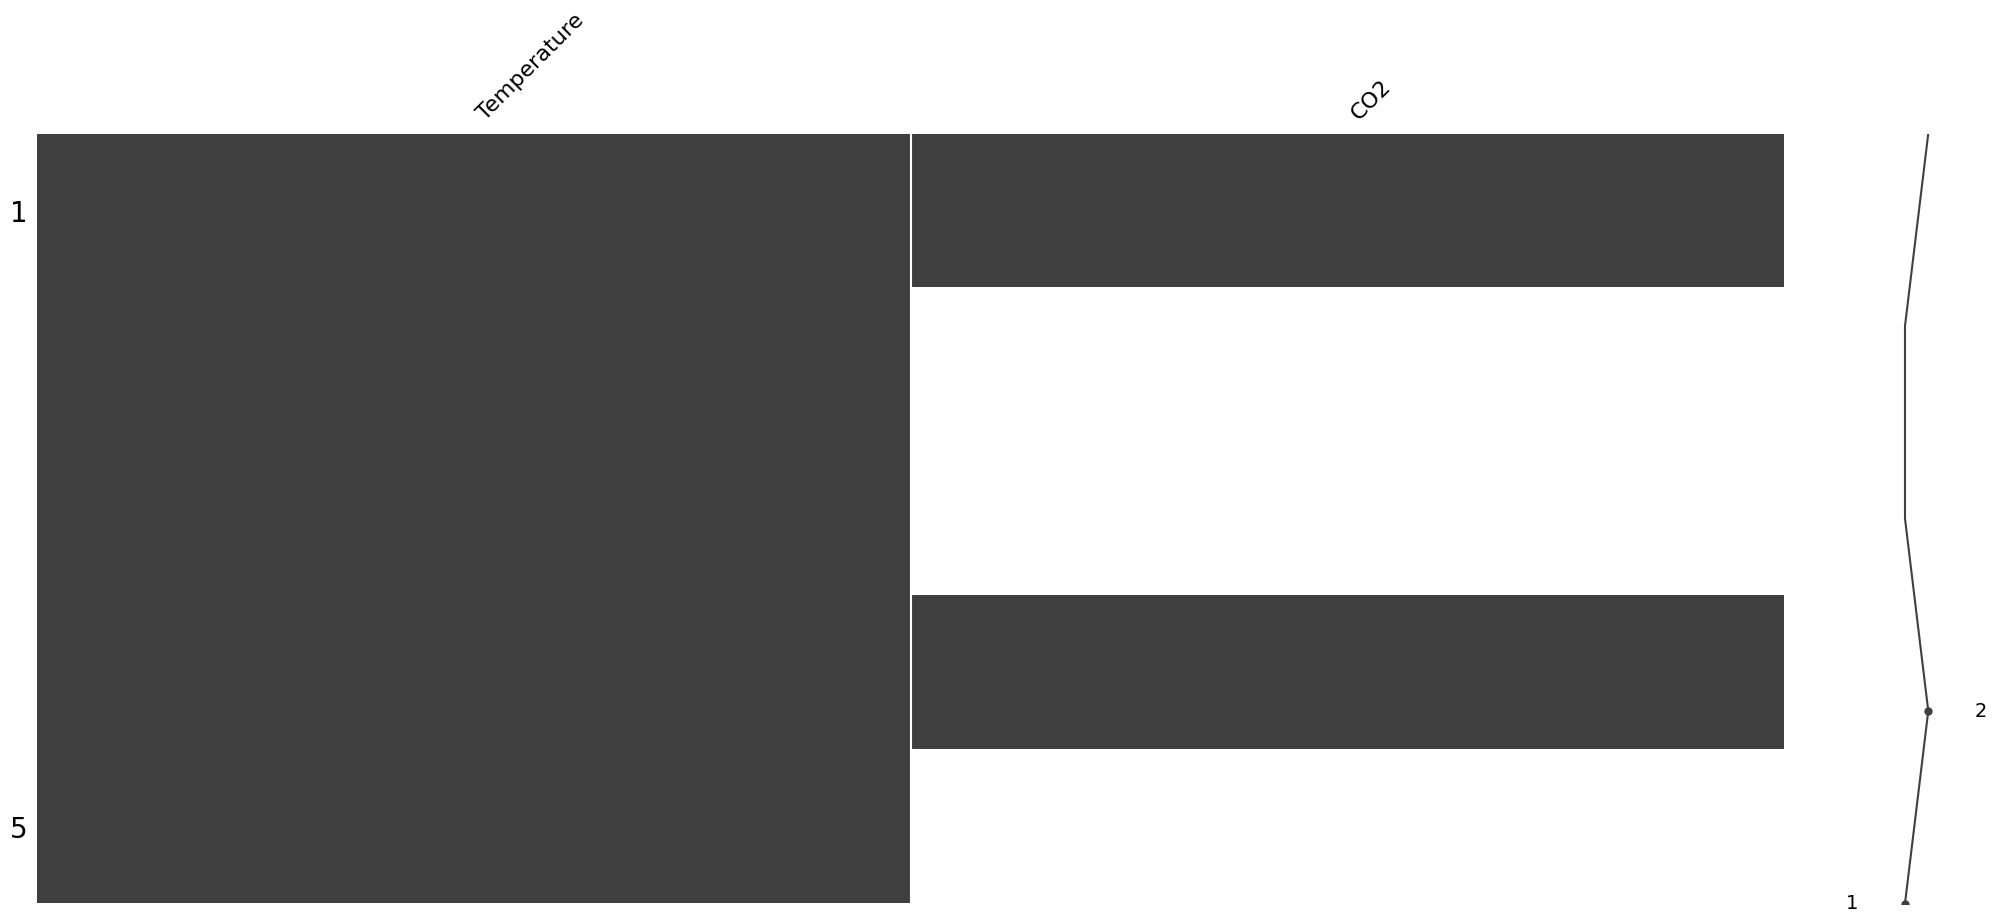

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(airquality)
plt.show()

In [61]:
airquality.dropna(subset=["CO2"], inplace=True)
airquality

,Temperature,CO2
0,15,2.5
3,20,3.1


In [66]:
airquality = pd.DataFrame({
    "Temperature": [15, -39, -49, 20, -30],
    "CO2": [2.5, np.nan, np.nan, 3.1, np.nan]
})

In [67]:
mean_co2 = airquality["CO2"].mean(skipna=True)
airquality["CO2"] = airquality["CO2"].fillna(mean_co2)
airquality

,Temperature,CO2
0,15,2.5
1,-39,2.8
2,-49,2.8
3,20,3.1
4,-30,2.8


# **Ch4 Record linkage**

## **4.1 Comparing strings**

### **🔹 1. Minimum Edit Distance**

هو مقياس بيحسب أقل عدد عمليات لازم نعملها علشان نحول كلمة لكلمة تانية.
العمليات المتاحة:

Insertion → إضافة حرف

Deletion → حذف حرف

Substitution → استبدال حرف

Transposition → تبديل مكان حرفين متتالين

### **📌 مثال:**

من "intention" إلى "execution"

احذف "i" → "ntention"

أضف "c" → "ncention"

استبدل n بـ e, t بـ x, و n بـ u
= "execution" ✅

إجمالي = 5 خطوات → الـ edit distance = 5

👉 كل ما الـ distance يكون أصغر، الكلمتين يكونوا أقرب لبعض.

### **🔹 2. thefuzz (fuzzywuzzy سابقًا)**

مكتبة بتسهل علينا حساب التشابه بين النصوص باستخدام خوارزميات زي Levenshtein distance.

بدل ما يرجعلك "عدد العمليات" (زي الـ edit distance)، بيدي Score من 0 لـ 100:

100 = النصوص متطابقة

0 = مفيش أي شبه

In [12]:
from thefuzz import fuzz

print(fuzz.WRatio("reading", "readding"))   # 93
print(fuzz.WRatio("reading", "writing"))    # 57
print(fuzz.WRatio("pytHon", "Python"))      # 100
print(fuzz.WRatio("Data Cleaning", "Cleaning"))      # 90
print(fuzz.WRatio("Numpy", "pandas"))                # 18

# الميزة في WRatio إنه بيتعامل مع اختلاف الترتيب أو النصوص الجزئية.


93
57
100
90
18


### **🔹 3. Extract (مقارنة مع Array)**

In [14]:
from thefuzz import process

choices = ["New York", "California", "Texas", "Nevada"]
print(process.extract("Californa", choices, limit=3))

# limit=3  ==  يعني رجعلي أفضل 3 مطابقات (بترتيب الدرجات).

[('California', 95), ('Nevada', 45), ('Texas', 30)]


In [18]:
import pandas as pd
from thefuzz import process

survey = pd.DataFrame({
    "State": ["new york", "Nwe York", "californa", "Cali", "Texas"],
    "Answer": [3, 4, 2, 5, 1]
})

categories = ["New York", "California", "Texas"]

for state in categories:
    matches = process.extract(state, survey["State"], limit=len(survey))
    for match, score, idx in matches:
        if score >= 80:  # threshold
            survey.loc[survey["State"] == match, "State"] = state

(survey)



,State,Answer
0,New York,3
1,New York,4
2,California,2
3,California,5
4,Texas,1


## **4.2 Generating pairs**

In [21]:
import pandas as pd

# DataFrame A
census_A = pd.DataFrame({
    "first_name": ["John", "Jane", "Michael", "Emily", "Sara"],
    "last_name": ["Smith", "Doe", "Johnson", "Davis", "Miller"],
    "city": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]
})

# DataFrame B
census_B = pd.DataFrame({
    "first_name": ["Jon", "Jane", "Micheal", "Emilie", "Sarah"],
    "last_name": ["Smyth", "Do", "Jonson", "Davies", "Miler"],
    "city": ["New York", "Los Angles", "Chicago", "Huston", "Pheonix"]
})

print("Census A:")
display(census_A)
print("Census B:")
display(census_B)


Census A:


,first_name,last_name,city
0,John,Smith,New York
1,Jane,Doe,Los Angeles
2,Michael,Johnson,Chicago
3,Emily,Davis,Houston
4,Sara,Miller,Phoenix


Census B:


,first_name,last_name,city
0,Jon,Smyth,New York
1,Jane,Do,Los Angles
2,Micheal,Jonson,Chicago
3,Emilie,Davies,Huston
4,Sarah,Miler,Pheonix


In [22]:
import recordlinkage

# نعمل Indexing object
indexer = recordlinkage.Index()

# لو عملنا Full index → هيولد كل الازواج الممكنة
indexer.full()

# نولد الـ pairs
pairs = indexer.index(census_A, census_B)
print(pairs)


MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (0, 4),
            (1, 0),
            (1, 1),
            (1, 2),
            (1, 3),
            (1, 4),
            (2, 0),
            (2, 1),
            (2, 2),
            (2, 3),
            (2, 4),
            (3, 0),
            (3, 1),
            (3, 2),
            (3, 3),
            (3, 4),
            (4, 0),
            (4, 1),
            (4, 2),
            (4, 3),
            (4, 4)],
           )


In [23]:
indexer = recordlinkage.Index()
indexer.block("city")
pairs_blocked = indexer.index(census_A, census_B)
pairs_blocked

MultiIndex([(0, 0),
            (2, 2)],
           )

In [24]:
compare = recordlinkage.Compare()

# exact match (للاسم الأخير مثلاً)
compare.exact("last_name", "last_name", label="last_name")

# string similarity (للاسم الأول)
compare.string("first_name", "first_name", threshold=0.85, label="first_name")

# string similarity (للمدينة)
compare.string("city", "city", threshold=0.85, label="city")

# نحسب النتائج
features = compare.compute(pairs_blocked, census_A, census_B)
print(features)


     last_name  first_name  city
0 0          0         0.0   1.0
2 2          0         0.0   1.0


In [25]:
matches = features[features.sum(axis=1) >= 2]
print(matches)


Empty DataFrame
Columns: [last_name, first_name, city]
Index: []


## **4.3 Linking DataFrames**